## Notes

- maybe we might need to crop the image to remove black borders on the side
- normalize the image
- use cross validation
- cv2 to visualise images or plt


# Eye disease Recognition

### Introduction

Using images from eyes fundus recognition an healthy eye versus a sick eye and determine what's the sickeness. 

### Dataset

Ocular Disease Intelligent Recognition (ODIR) is a structured ophthalmic database of 5,000 patients with age, color fundus photographs from left and right eyes and doctors' diagnostic keywords from doctors.

This dataset is meant to represent ‘‘real-life’’ set of patient information collected by Shanggong Medical Technology Co., Ltd. from different hospitals/medical centers in China. In these institutions, fundus images are captured by various cameras in the market, such as Canon, Zeiss and Kowa, resulting into varied image resolutions.
Annotations were labeled by trained human readers with quality control management. They classify patient into eight labels including:

- Normal (N),
- Diabetes (D),
- Glaucoma (G),
- Cataract (C),
- Age related Macular Degeneration (A),
- Hypertension (H),
- Pathological Myopia (M),
- Other diseases/abnormalities (O)

### Objectives

Identify one or more diseases in a specific eye using an image of the fundus. Given an eye fundus, the model will output a list of diseases if any present.

In [36]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

## Data exploratory analysis

In [2]:
# load data
df = pd.read_csv("../data/full_df.csv")

In [3]:
df[df['ID'] == 4659]

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
6372,4659,42,Male,4659_left.jpg,4659_right.jpg,mild nonproliferative retinopathy,intraretinal microvascular abnormality,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODI...,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4659_left.jpg


In the dataset, each row corresponds to one patient. Each row contains one image for each eye.The diagnosis does not specify which eye has the disease although we can get this information from the columns labelled as `Left-Diagnostic Keywords` and `Right-Diagnostic Keywords`.

Using the labels mentioned above, we need to convert the wordings into the labels with right abbreviations which are N,D,G,C,A,H,M,O.

The inputs to the model would be the images of both eyes and the output would be one or more of the following for each patient:

- Normal (N),
- Diabetes (D),
- Glaucoma (G),
- Cataract (C),
- Age related Macular Degeneration (A),
- Hypertension (H),
- Pathological Myopia (M),
- Other diseases/abnormalities (O)

In [37]:
df.describe()

,N,D,G,C,A,H,M,O
count,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000,6392.000000
mean,0.328692,0.332134,0.062109,0.062891,0.049906,0.031758,0.047872,0.248436
std,0.469775,0.471016,0.241372,0.242786,0.217768,0.175370,0.213513,0.432139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


There are 6392 patients,ranging from 1 year old to 91 years old. The mean is 57.8 years old,the median is 59.

<BarContainer object of 8 artists>

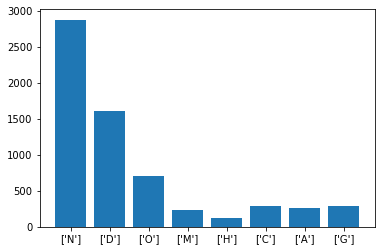

In [16]:
value_counts = df['labels'].value_counts(sort=False).to_dict()
plt.bar(value_counts.keys(), value_counts.values())

In [18]:
value_counts

{"['N']": 2873,
 "['D']": 1608,
 "['O']": 708,
 "['M']": 232,
 "['H']": 128,
 "['C']": 293,
 "['A']": 266,
 "['G']": 284}

In [33]:
(value_counts["['N']"]/len(df.index))*100

44.9468085106383

In the dataset, the percentage of patients having both healthy eyes is 44.9%